# Annotate physicochemical properties for NTD drugs

### Import modules

In [1]:
import pandas as pd
from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import Descriptors

### Load data

In [2]:
df = pd.read_csv("../data/ntd_drugs.tsv", sep="\t")
df.head(2)

,chembl_id,pref_name,canonical_smiles,standard_inchi,standard_inchi_key,max_phase,indication_class,withdrawn_flag,black_box_warning,drugind_id,max_phase_for_ind,mesh_id,mesh_heading,ref_type,ref_id,ref_url
0,CHEMBL1200689,NITRIC OXIDE,[N]=O,InChI=1S/NO/c1-2,MWUXSHHQAYIFBG-UHFFFAOYSA-N,4.0,NaN,0,0,23580,3.0,D016773,"Leishmaniasis, Cutaneous",ClinicalTrials,NCT00317629,https://clinicaltrials.gov/ct2/results?id=%22N...
1,CHEMBL131,PREDNISOLONE,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2[C@@H](O)C[...,InChI=1S/C21H28O5/c1-19-7-5-13(23)9-12(19)3-4-...,OIGNJSKKLXVSLS-VWUMJDOOSA-N,4.0,Glucocorticoid,0,0,24801,2.0,D007918,Leprosy,ClinicalTrials,"NCT00919542,NCT00919776,NCT00919815",https://clinicaltrials.gov/ct2/results?id=%22N...


### Calculate chemphys properties

In [3]:
df = df[["chembl_id", "pref_name", "canonical_smiles"]]
df.drop_duplicates(inplace=True)

In [4]:
chemphys_data = []

for idx, name, smiles in tqdm(df.values):
    mol = Chem.MolFromSmiles(smiles)

    if mol is None:
        continue

    mw = Descriptors.ExactMolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    rot_bonds = Descriptors.NumRotatableBonds(mol)
    tpsa = Chem.rdMolDescriptors.CalcTPSA(mol)
    heavy_atoms = mol.GetNumHeavyAtoms()

    chemphys_data.append(
        {
            "chembl_id": idx,
            "pref_name": name,
            "canonical_smiles": smiles,
            "MW (Da)": mw,
            "ALogP": logp,
            "Rotatable bonds": rot_bonds,
            "TPSA": tpsa,
            "HBD": hbd,
            "HBA": hba,
            "HAC": heavy_atoms,
        }
    )

chemphys_df = pd.DataFrame(chemphys_data)

  0%|          | 0/46 [00:00<?, ?it/s]

100%|██████████| 46/46 [00:00<00:00, 525.76it/s]


In [5]:
chemphys_df.head(2)

,chembl_id,pref_name,canonical_smiles,MW (Da),ALogP,Rotatable bonds,TPSA,HBD,HBA,HAC
0,CHEMBL1200689,NITRIC OXIDE,[N]=O,29.997989,-0.4471,0,39.37,0,1,2
1,CHEMBL131,PREDNISOLONE,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2[C@@H](O)C[...,360.193674,1.5576,2,94.83,3,5,26


In [6]:
chemphys_df.to_csv("../data/ntd_drugs_chemphys.tsv", sep="\t", index=False)

# Physicochemical exploration

<Axes: title={'center': 'Molecular Weight (Da)'}, ylabel='Frequency'>

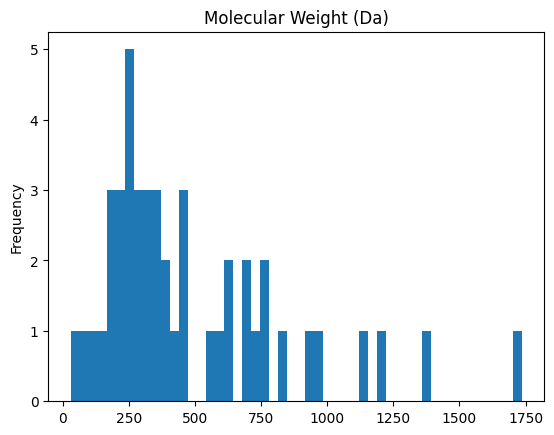

In [9]:
chemphys_df["MW (Da)"] = chemphys_df["MW (Da)"].round(2)
chemphys_df["MW (Da)"].plot(kind="hist", bins=50, title="Molecular Weight (Da)")

In [11]:
chemphys_df["MW (Da)"].mean(), chemphys_df["MW (Da)"].std()

(489.22869565217377, 361.4584759345498)

In [12]:
chemphys_df.sort_values(by=["MW (Da)"], ascending=False).head(5)

,chembl_id,pref_name,canonical_smiles,MW (Da),ALogP,Rotatable bonds,TPSA,HBD,HBA,HAC
12,CHEMBL1200633,IVERMECTIN,CC[C@H](C)[C@H]1O[C@]2(CC[C@@H]1C)C[C@@H]1C[C@...,1735.00,10.8127,15,340.12,6,28,123
27,CHEMBL3039597,GENTAMICIN,CNC(C)[C@@H]1CC[C@@H](N)[C@@H](O[C@H]2[C@H](O)...,1389.90,-10.8924,19,627.17,24,36,96
2,CHEMBL160,CYCLOSPORINE,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,1201.84,3.2690,15,278.80,5,12,85
38,CHEMBL393220,ATORVASTATIN CALCIUM,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,1154.45,9.5770,24,229.24,6,12,83
31,CHEMBL3989515,PENICILLIN G BENZATHINE,CC1(C)S[C@@H]2[C@H](NC(=O)Cc3ccccc3)C(=O)N2[C@...,980.40,0.9888,15,323.48,6,10,68
